In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/heart.csv')
df.head()

In [ ]:
df.target.value_counts().plot(kind='bar')
plt.show()

In [107]:
X= df.iloc[:,:-1]   #[: ,0:-1]
y = df['target']
print(X.shape,y.shape)

(303, 13) (303,)


In [108]:
featSelector = SelectKBest(chi2,k=2)
featSelector.fit(X,y)
print(featSelector.scores_)
print(featSelector.get_feature_names_out())

[ 23.28662399   7.57683451  62.59809791  14.8239245   23.93639448
   0.20293368   2.97827075 188.32047169  38.91437697  72.64425301
   9.8040952   66.44076512   5.79185297]
['thalach' 'oldpeak']


In [116]:
features = X[featSelector.get_feature_names_out()]
features.head()
scaler = StandardScaler()
scaledX= scaler.fit_transform(features)

In [117]:
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y,test_size=.2,random_state=1)

In [118]:
xtrain.shape

(242, 2)

In [127]:
clf = SVC(kernel='linear')
clf.fit(xtrain,ytrain)

SVC(kernel='linear')

In [128]:
ypred = clf.predict(xtrain)
print(confusion_matrix(ytrain,ypred))
print(classification_report(ytrain,ypred))

[[ 66  42]
 [ 22 112]]
              precision    recall  f1-score   support

           0       0.75      0.61      0.67       108
           1       0.73      0.84      0.78       134

    accuracy                           0.74       242
   macro avg       0.74      0.72      0.73       242
weighted avg       0.74      0.74      0.73       242



decomposition example

In [101]:
from sklearn.decomposition import PCA

In [102]:
pca = PCA(n_components=3)
decomposed_x = pca.fit_transform(X)

In [103]:
import plotly.express as px

In [104]:
px.scatter_3d(x=decomposed_x[:,0],y=decomposed_x[:,1],z=decomposed_x[:,2],color=y.values)

implement the SVC model on this data

In [121]:
from utils import plot_area_distribution

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


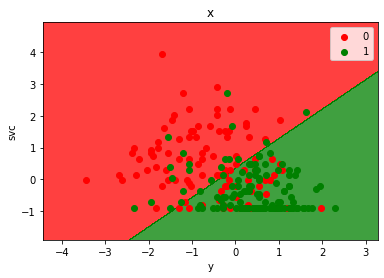

In [129]:
plot_area_distribution(clf,xtrain,ytrain,"x","y","svc")

In [123]:
clf

SVC(kernel='poly')